# Stock Analysis

I would like to compare the last 5-year's performance of stocks for Apple and Ferrari to S&P 500

In [69]:
# Load packages and read the data files

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

spx = pd.read_csv('spx.csv')
apple = pd.read_csv('aapl.csv')
ferrari = pd.read_csv('race.csv')

## First I want to look at the datasets and do some cleaning if necessary

In [70]:
spx.head()

,Date,Close/Last,Volume,Open,High,Low
0,04/11/2022,4412.53,--,4462.64,4464.35,4408.38
1,04/08/2022,4488.28,--,4494.15,4520.41,4474.60
2,04/07/2022,4500.21,--,4474.65,4521.16,4450.30
3,04/06/2022,4481.15,--,4494.17,4503.94,4450.04
4,04/05/2022,4525.12,--,4572.45,4593.45,4514.17


In [71]:
ferrari.head()

,Date,Close/Last,Volume,Open,High,Low
0,04/11/2022,$220.76,595217,$219.24,$223.3,$218.58
1,04/08/2022,$219.51,356426,$217.92,$222.28,$217.74
2,04/07/2022,$221.4,458763,$221.36,$222.3,$216.9
3,04/06/2022,$220.2,553786,$221.24,$221.85,$218
4,04/05/2022,$225.78,620142,$228.84,$230.28,$224.65


In [72]:
apple.head()

,Date,Close/Last,Volume,Open,High,Low
0,04/11/2022,$165.75,72246710,$168.71,$169.03,$165.5
1,04/08/2022,$170.09,76575510,$171.78,$171.78,$169.2
2,04/07/2022,$172.14,77594650,$171.16,$173.36,$169.85
3,04/06/2022,$171.83,89058780,$172.36,$173.63,$170.13
4,04/05/2022,$175.06,73401790,$177.5,$178.3,$174.415


In [73]:
# Let's first rename some columns that I will be using 

spx = spx.rename(  
        columns={
                'Date': 'date', 
                'Close/Last': 'close',
                }
)
spx.head()

,date,close,Volume,Open,High,Low
0,04/11/2022,4412.53,--,4462.64,4464.35,4408.38
1,04/08/2022,4488.28,--,4494.15,4520.41,4474.60
2,04/07/2022,4500.21,--,4474.65,4521.16,4450.30
3,04/06/2022,4481.15,--,4494.17,4503.94,4450.04
4,04/05/2022,4525.12,--,4572.45,4593.45,4514.17


In [74]:
# Do the same for the other two datasets

apple = apple.rename(  
        columns={
                'Date': 'date', 
                'Close/Last': 'close',
                }
)

ferrari = ferrari.rename(  
        columns={
                'Date': 'date', 
                'Close/Last': 'close',
                }
)

In [75]:
# Check for data types

spx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   close   1259 non-null   float64
 2   Volume  1259 non-null   object 
 3   Open    1259 non-null   float64
 4   High    1259 non-null   float64
 5   Low     1259 non-null   float64
dtypes: float64(4), object(2)
memory usage: 59.1+ KB


In [76]:
# Looks like date is an object I need to convert it into datetime64

spx.date = pd.to_datetime(spx.date)
apple.date = pd.to_datetime(apple.date)
ferrari.date = pd.to_datetime(ferrari.date)

spx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1259 non-null   datetime64[ns]
 1   close   1259 non-null   float64       
 2   Volume  1259 non-null   object        
 3   Open    1259 non-null   float64       
 4   High    1259 non-null   float64       
 5   Low     1259 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 59.1+ KB


In [77]:
ferrari.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1259 non-null   datetime64[ns]
 1   close   1259 non-null   object        
 2   Volume  1259 non-null   int64         
 3   Open    1259 non-null   object        
 4   High    1259 non-null   object        
 5   Low     1259 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 59.1+ KB


In [78]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1259 non-null   datetime64[ns]
 1   close   1259 non-null   object        
 2   Volume  1259 non-null   int64         
 3   Open    1259 non-null   object        
 4   High    1259 non-null   object        
 5   Low     1259 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 59.1+ KB


In [79]:
# It seems that column close in apple and ferrari datasets are objects, I need to convert it to float64

apple.close = aapl.close.str.replace('$','',regex=False)
apple.close = apple.close.astype(float)

ferrari.close = race.close.str.replace('$','',regex=False)
ferrari.close = ferrari.close.astype(float)

apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1259 non-null   datetime64[ns]
 1   close   1259 non-null   float64       
 2   Volume  1259 non-null   int64         
 3   Open    1259 non-null   object        
 4   High    1259 non-null   object        
 5   Low     1259 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 59.1+ KB


In [80]:
# Set the index to date and sort

spx.set_index('date',inplace=True)
apple.set_index('date', inplace=True)
ferrari.set_index('date',inplace=True)

spx.sort_index(inplace=True)
apple.sort_index(inplace=True)
ferrari.sort_index(inplace=True)

In [81]:
spx.head()

,close,Volume,Open,High,Low
date,,,,,
2017-04-12,2344.93,--,2352.15,2352.72,2341.18
2017-04-13,2328.95,--,2341.98,2348.26,2328.95
2017-04-17,2349.01,--,2332.62,2349.14,2332.51
2017-04-18,2342.19,--,2342.53,2348.35,2334.54
2017-04-19,2338.17,--,2346.79,2352.63,2335.05


## Datasets are now prepared and its time to analyze the five year performances

In [82]:
# Calculate five year return for S&P 500

first_spx = spx.loc[spx.index.min()].close
last_spx = spx.loc[spx.index.max()].close
five_year_spx = (last_spx-first_spx)/first_spx

print(f'The five year return for S&P 500 is {five_year_spx:.2f}')

The five year return for S&P 500 is 0.88


In [83]:
# Do the same for apple and ferrari

first_apple = apple.loc[apple.index.min()].close
last_apple = apple.loc[apple.index.max()].close
five_year_apple = (last_apple-first_apple)/first_apple

first_ferrari = ferrari.loc[ferrari.index.min()].close
last_ferrari = ferrari.loc[ferrari.index.max()].close
five_year_ferrari = (last_ferrari-first_ferrari)/first_ferrari

print(f'The five year return for Apple is {five_year_apple:.2f}')
print(f'The five year return for Ferrari is {five_year_ferrari:.2f}')

The five year return for Apple is 3.68
The five year return for Ferrari is 2.08


In [84]:
# Normalize the prices

spx['close_norm'] = spx.close.div(first_spx).mul(100)

apple['close_norm'] = apple.close.div(first_apple).mul(100)

ferrari['close_norm'] = ferrari.close.div(first_ferrari).mul(100)

apple.head()

,close,Volume,Open,High,Low,close_norm
date,,,,,,
2017-04-12,35.4500,81281680,$35.4,$35.5375,$35.2525,100.000000
2017-04-13,35.2625,71102040,$35.4775,$35.595,$35.2625,99.471086
2017-04-17,35.4575,66116520,$35.37,$35.47,$35.2175,100.021157
2017-04-18,35.3000,58705680,$35.3525,$35.51,$35.2775,99.576869
2017-04-19,35.1700,69208640,$35.47,$35.5,$35.1125,99.210155


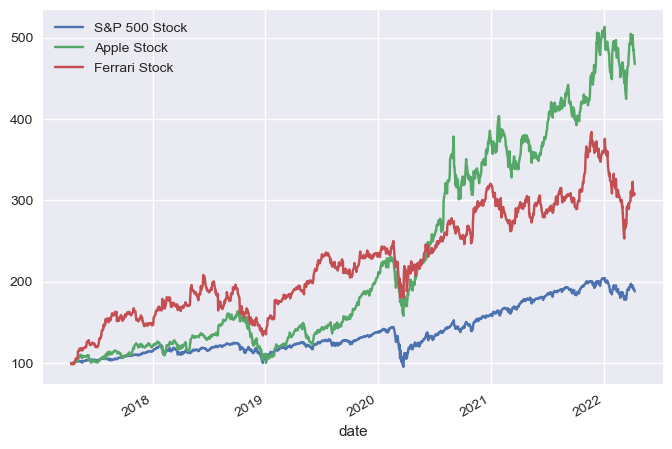

In [85]:
# Plot the comparison chart

fig, ax = plt.subplots()
spx.close_norm.plot(label='S&P 500 Stock')
apple.close_norm.plot(label='Apple Stock')
ferrari.close_norm.plot(label='Ferrari Stock')
ax.legend()